# Exercício Programa 2

Aluno: Luiz Fillipe Oliveira Morais ;
Matrícula: 2019107733

## Modulos necessários

In [1]:
import matplotlib.pyplot as plt
import math

## Função
Equação 2

$f(x) = sin^2(x) + 2sin^4(2x)$ 

In [2]:
def funcao2():
    """ESSA FUNÇÃO É A INTEGRAL 2"""
    return lambda x:(math.sin(x)**2)+(2*((math.sin(2*x))**4))

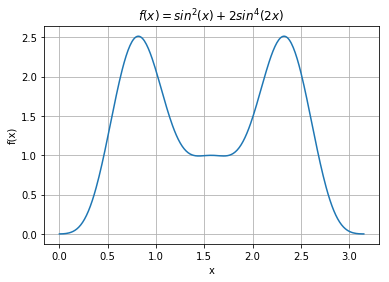

In [3]:
pi=math.pi
def myRange(n,step, L=[0], i=0):
    '''ESSA FUNCAO RETORNA OS ELEMENTOS DE 0 A N COM STEP'''
    if L[i]>n:
        return L[1:]
    else:
        return myRange(n,step, L+[i*step], i+1)
        
x = myRange(pi,0.01)
y = list (map(funcao2(),x))
fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='x', ylabel='f(x)', title=r'$f(x) = sin^2(x) + 2sin^4(2x)$')
ax.grid()

plt.savefig('ep2_funcao.pdf',bbox_inches='tight') #salva o gráfico

plt.show()

## Implementação da Regra dos Trapézios

In [4]:
def ruleoftrapezio(fx,a,b,n,i=0,s=0):
    deltax=(b-a)/n
    if i==n:
        valor=s*(deltax/2)
        return valor
    else:
        s+= fx(i*deltax) + fx((i+1)*deltax)
        return ruleoftrapezio(fx,a,b,n,i+1,s) 

## Implementação da Regra de Simpson

In [5]:
def regraSimpson(fx,a,b,n,i=1,somapar=0,somaimpar=0):
    deltax=(b-a)/n
    if i<n:
        if i%2==0:
            somapar+= fx(i*deltax)
            return regraSimpson(fx,a,b,n,i+1,somapar,somaimpar)
        else:
            somaimpar+= fx(i*deltax)
            return regraSimpson(fx,a,b,n,i+1,somapar,somaimpar)
    else:
        valor=(deltax)/3 * (fx(a)+fx(b) + 4*somaimpar + 2* somapar)
        return valor

## Implementação da terceira função solicitada no médulo integral

In [6]:
def integrais(funcaoTipo,f,a,b,L,i=0,r=[]):
    if i<len(L):
        n1=funcaoTipo(f,a,b,L[i])
        return integrais(funcaoTipo,f,a,b,L,i+1,r+[n1])
    else:
        return r


## Outras funções implementadas

In [7]:
def calculaErroTrapezio(valorexato,integral1,r=[],i=0):
    '''Essa função calcula o erro da integral pela regra dos trapézios e 
    retorna uma lista com esses erros'''
    if i<len(integral1):
        erro=(abs(integral1[i]-valorexato))/valorexato
        return calculaErroTrapezio(valorexato,integral1,r+[erro],i+1)
    else:
        return r
def calculaErroSimpson(valorexato,integral2,r=[],i=0):
    '''Essa função calcula o erro da integral de simpson e 
    retorna uma lista com esses erros'''
    if i<len(integral2):
        erro=(abs(integral2[i]-valorexato))/valorexato
        return calculaErroTrapezio(valorexato,integral2,r+[erro],i+1)
    else:
        return r


## Função `main()`

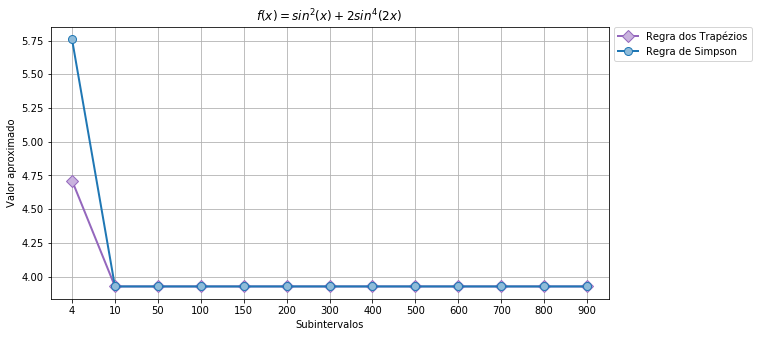

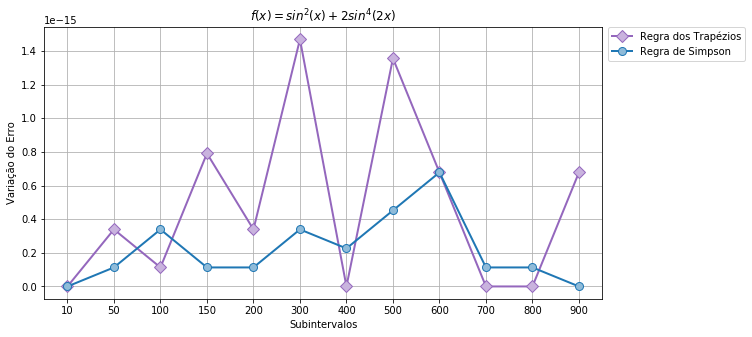

In [8]:
def main():
    #Subintervalos utilizados
    N = [4, 10, 50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900]
    x = [x*2 for x in range(len(N))]

    
    #Regra dos Trapézios
    
    y1 = integrais(ruleoftrapezio,funcao2(),0,pi,N) # aqui tem uma lista com as integrais referente aos intervalos

    
    #Regra de Simpson
    
    y2 = integrais(regraSimpson,funcao2(),0,pi,N) # aqui tem uma lista com as integrais referente aos intervalos
    
    
    ###################################### Gráfico 1 ######################################
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, y1, label='Regra dos Trapézios', lw=2, markersize=8, color='#9467BD', marker='D', markeredgecolor='#9467BD', markerfacecolor='#C9B3DE')
    ax.plot(x, y2, label='Regra de Simpson',    lw=2, markersize=8, color='#1F77B4', marker='o', markeredgecolor='#1F77B4', markerfacecolor='#8FBBD9')
     
    #Legenda
    handles, labels = ax.get_legend_handles_labels()
    leg = ax.legend(handles, labels, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    
    ax.set(xlabel='Subintervalos', ylabel='Valor aproximado', title=r'$f(x) = sin^2(x) + 2sin^4(2x)$')
    ax.grid()
    
    #Exibe todos os valores do eixo x.
    ticks = [str(x) for x in N]
    plt.xticks(range(0, len(ticks)*2, 2), ticks) 
    plt.xlim(-1, len(ticks)*2-1)

    
    plt.savefig('ep2_grafico1.pdf',bbox_inches='tight') #salva o gráfico
    plt.show()
    #####################################################################################


    
    ###################################### Gráfico 2 ######################################

    N = [10, 50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900]
    x = [x*2 for x in range(len(N))]
    
  
    #Regra dos Trapézios
    y1 = integrais(ruleoftrapezio,funcao2(),0,pi,N) # aqui tem uma lista com as integrais referente aos intervalos 
    #Regra de Simpson
    y2 = integrais(regraSimpson,funcao2(),0,pi,N) # aqui tem uma lista com as integrais referente aos intervalos
    
    #calcula o erro
    valorExato=(5*math.pi)/4
    erroT=calculaErroTrapezio(valorExato,y1) #calcula o erro do trapezio
    erroS=calculaErroSimpson(valorExato,y2)  #calcula o erro de simpson
    
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, erroT, label='Regra dos Trapézios', lw=2, markersize=8, color='#9467BD', marker='D', markeredgecolor='#9467BD', markerfacecolor='#C9B3DE')
    ax.plot(x, erroS, label='Regra de Simpson',    lw=2, markersize=8, color='#1F77B4', marker='o', markeredgecolor='#1F77B4', markerfacecolor='#8FBBD9')
            
    #Legenda
    handles, labels = ax.get_legend_handles_labels()
    leg = ax.legend(handles, labels, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    
    ax.set(xlabel='Subintervalos', ylabel='Variação do Erro', title=r'$f(x) = sin^2(x) + 2sin^4(2x)$')
    ax.grid()
    
    #Exibe todos os valores do eixo x.
    ticks = [str(x) for x in N]
    plt.xticks(range(0, len(ticks)*2, 2), ticks) 
    plt.xlim(-1, len(ticks)*2-1)
    
    
    plt.savefig('ep2_grafico2.pdf',bbox_inches='tight') #salva o gráfico
    plt.show()

main()